# Part 2 - Simple Logistic Regression Model (~1 page)
---

***You should create one or more reasonable baselines for your Fake News predictor. These should be simple models that you can use to benchmark your more advanced models against. You should aim to train a binary classification model that can predict whether an article is reliable or fake.***

## Task 0
---

***Briefly discuss how you grouped the labels into two groups. Are there any limitations that could arise from the decisions you made when grouping the labels?***

Counting amount of specific labels in column...
 - Read file...
 - Extracted values from the column...
 - Counted occurrences...

Result of function:
 - political: 	194518
 - fake: 	104883
 - satire: 	13160
 - reliable: 	218564
 - conspiracy: 	97314
 - unreliable: 	35332
 - bias: 	133232
 - clickbait: 	27412
 - hate: 	8779
 - junksci: 	14040


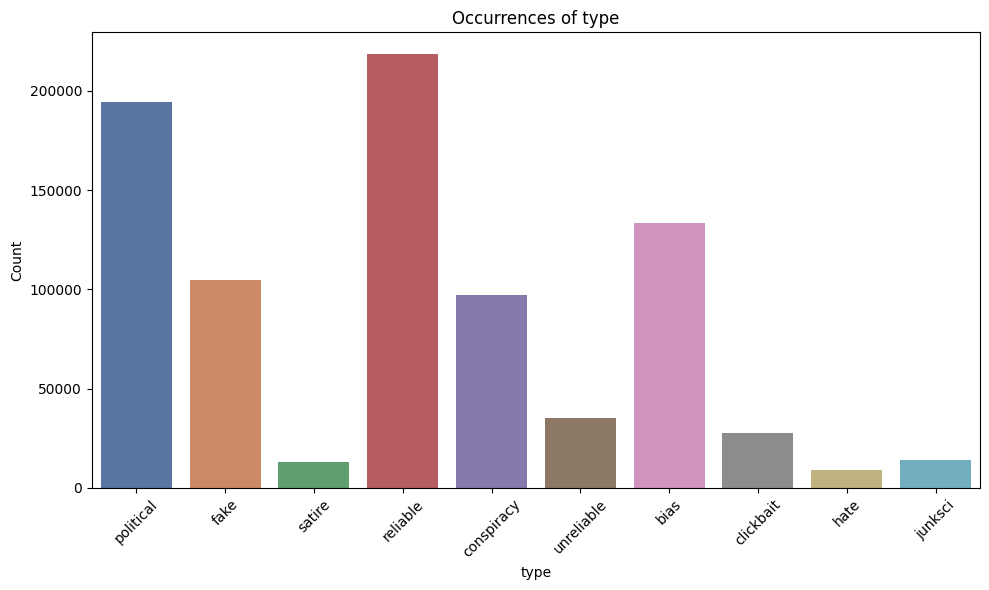

In [4]:
import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "cleaned_file.csv"  # File to read
column_name = "type"  # Column to search
labels_to_search = ["fake", "satire", "bias", "conspiracy", "state", "junksci", "hate", "clickbait", "unreliable", "political", "reliable"]  # List of labels to search for

print("Counting amount of specific labels in column...")

def count_column_values(file_path, column_name, labels_to_search):
    df = pd.read_csv(file_path)
    print(" - Read file...")

    # Check if the column exists
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    # Extract values from the column
    values = df[column_name].dropna().astype(str)  # Convert to string & drop NaN values
    print(" - Extracted values from the column...")

    # Filter the values based on the labels_to_search list
    filtered_values = [value for value in values if value in labels_to_search]
    
    # Count occurrences of the filtered values
    value_counts = Counter(filtered_values)
    print(" - Counted occurrences...")

    print("\nResult of function:")
    for value, count in value_counts.items():
        print(f" - {value}: \t{count}")

    # Plotting the result
    plot_data = pd.DataFrame(value_counts.items(), columns=[column_name, 'Count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='Count', data=plot_data, palette="deep")
    plt.xticks(rotation=45)  
    plt.title(f"Occurrences of {column_name}")
    plt.xlabel(f"{column_name}")
    plt.ylabel("Count")
    plt.tight_layout()  
    plt.show()

# Example usage
count_column_values(file_path, column_name, labels_to_search)



FakeNews: 0, TrueNews: 1

Fake News: Fake  
Satire: Remove  
Extreme Bias: Fake  
Conspiracy Theory: Remove  
State News: Remove  
Junk Science: Remove  
Hate News: Remove  
Clickbait: True  
Proceed with Caution: Remove  
Political: True  
Credible: True  

---

CATEGORY EXPLANATIONS

Fake News:  
Labeled as fake due to its misleading or intentionally deceptive nature.  

Satire:  
Satire is highly context-dependent and, when taken out of context, can lead to misunderstandings in both directions.  

Extreme Bias:  
Due to its reliance on highly questionable foundations, often associated with propaganda or fake news, extreme bias is classified as fake news.  

Conspiracy Theory:  
Conspiracy theories are based on non-scientific claims. While they may contain some true elements, they often mix verified information with misinformation, making them unreliable.  

State News:  
Excluded due to the lack of data or counts, making it an indifferent feature.  

Junk Science:  
Based on non-scientific theories that, in a binary classification system, would be considered fake. However, some theories may be difficult to prove scientifically. The non-traditional scientific methods used might overlook truths, such as in topics like spirituality.  

Hate News:  
(To be analyzed using `most.common` for further classification.)  

Clickbait:  
Clickbait often originates from credible sources but presents information in a misleading, exaggerated way. While it is not outright false, it angles the narrative in a way that can distort reality without technically spreading fake news.  

Proceed with Caution:  
This category contains both fake and potentially true content but requires further verification. By definition, it presents hypotheses that are not yet verified and therefore cannot be conclusively categorized as true or false.  

Political:  
Generally derived from verified sources of factual information but often framed to align with a particular political ideology. It does not cross the threshold into fake news.  

Credible:  
Adheres to ethical journalistic standards, ensuring thorough source verification before publication.  

---

Kig på `most.common` for Hate News.


Beginning count of relevant types...
 - Read file...
 - Extracted values from the column...
 - Counted occurrences...

Result of function:
 - political: 	194518
 - fake: 	104883
 - reliable: 	218564
 - bias: 	133232
 - clickbait: 	27412


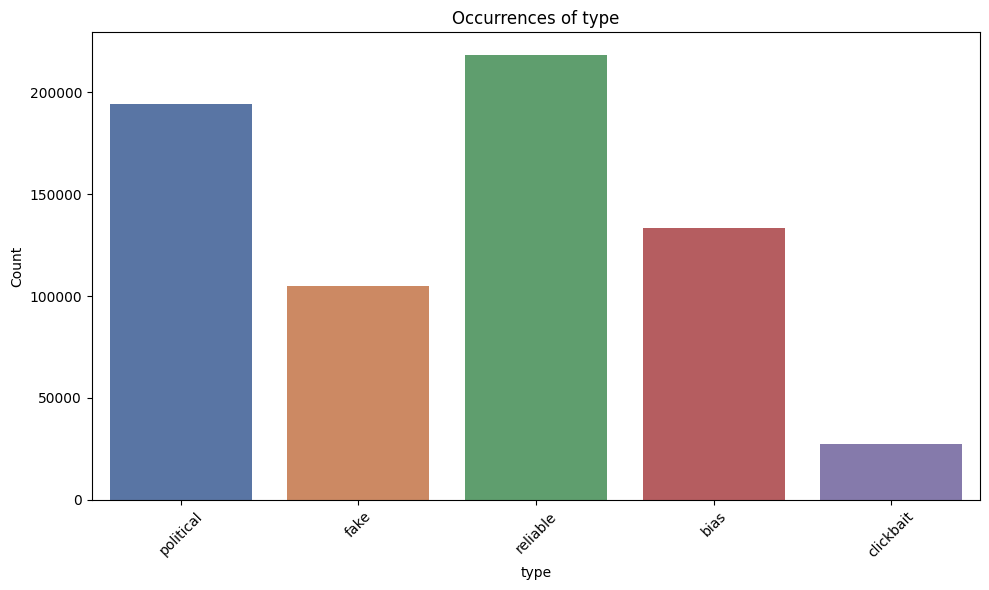

In [6]:
"""
BARPLOT AND COUNT AFTER REMOVING NON-RELEVANT TYPES
"""

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "cleaned_file.csv"  # File to read
column_name = "type"  # Column to search
labels_to_search = ["fake", "bias", "clickbait", "political", "reliable"]  # List of labels to search for
print("Beginning count of relevant types...")
count_column_values(file_path, column_name, labels_to_search)


Great. Now lets see how the distrubution of "Fake" and "True" looks like, when we add the count of each type together, for their respective category. 

True count (political, reliable): 440494
False count (fake, bias): 238115


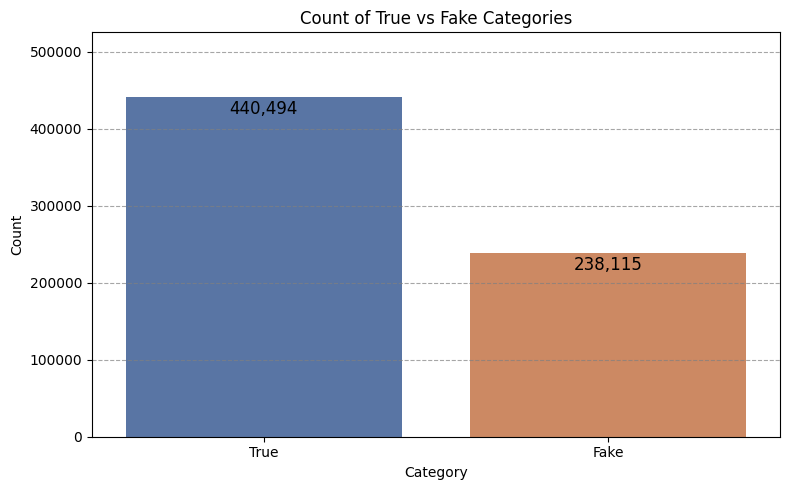

In [9]:
"""""""""""""""""""""""
BARPLOT TO SHOW DIFFERENCE IN 'FAKE' AND 'TRUE'
"""""""""""""""""""""""

import warnings
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

file_path = "995,000_rows.csv"  # File to read
column_name = "type"  # Column to search

# Function to categorize and sum counts based on labels
def categorize_and_count(file_path, column_name):
    # Define the categories and their labels
    true_labels = ["political", "reliable", "clickbait"]
    false_labels = ["fake", "bias"]
    
    # Read the file
    df = pd.read_csv(file_path)

    # Extract values from the column and drop NaN
    values = df[column_name].dropna().astype(str)  # Convert to string & drop NaN values
    
    # Count occurrences of each label
    value_counts = Counter(values)

    # Calculate the sum of counts for 'True' and 'False' categories
    true_count = sum([value_counts[label] for label in true_labels if label in value_counts])
    false_count = sum([value_counts[label] for label in false_labels if label in value_counts])

    # Print the counts for 'True' and 'False' categories
    print(f"True count (political, reliable): {true_count}")
    print(f"False count (fake, bias): {false_count}")
    
    # Prepare data for plotting
    plot_data = pd.DataFrame({"Category": ["True", "Fake"], "Count": [true_count, false_count]})

    # Plotting the result
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x="Category", y="Count", data=plot_data, palette="deep")

    # Add horizontal lines 
    y_max = max(true_count, false_count)  # Get max count
    for y in np.arange(100000, y_max + 100000, 100000):
        plt.axhline(y=y, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)

    # Add count values 
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() - (y_max * 0.05), 
                f"{int(p.get_height()):,}", ha="center", fontsize=12, color="black")

    # Labels and title
    plt.title("Count of True vs Fake Categories")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Call the function
categorize_and_count(file_path, column_name)


Based on the way we have decided to categorize our data, we can see that we have a surplus of "True" articles in the data we want to analyze. We have to keep this in mind when training and evaluating our model. 

## Task 1 
---

***Start by implementing and training a simple logistic regression classifier using a fixed vocabulary of the 10,000 most frequent words extracted from the content field, as the input features. You do not need to apply TF-IDF weighting to the features. It should take no more than five minutes to fit this model on a modern laptop, and you should expect to achieve an F1 score of ~94% on your test split. Write in your report the performance that you achieve with your implementation of this model, and remember to report any hyper-parameters used for the training process.***

In [3]:
"""""""""""""""""""""""
LOAD THE DATA
"""""""""""""""""""""""

import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)  # Suppress DtypeWarnings

Final_file_path = "cleaned_file.csv" #Insert Cleaned file here
data = pd.read_csv(Final_file_path)
print(f"Loaded file '{Final_file_path}'")
print("Unique values in 'type':", data['type'].unique())

Loaded file '/Users/simonhvidtfeldt/Group_project/Out from parts/Part 1/cleaned_file.csv'
Unique values in 'type': ['political' 'fake' 'satire' 'reliable' 'conspiracy' 'unreliable' 'bias'
 'rumor' 'unknown' nan 'clickbait' 'hate' 'junksci'
 '<NUM><DATE> <NUM>:<NUM>:<NUM>']


As can be seen by our data exploration, 'num' absolutely dominates the most frequently used word for all categories. We will therefor not include it into our simple model.

In [4]:
"""""""""""""""""""""""""""""""""""""""""""""
MAP LABELS TO CORRESPONDING VALUE. 1=True, 0=False
"""""""""""""""""""""""""""""""""""""""""""""
import pandas as pd

chunksize = 25000

chunks = []  # Safe the chunks of data

for chunk in pd.read_csv(Final_file_path, chunksize=chunksize, low_memory=False, converters={"content": eval}):
    # Fjern 'num' fra token-lister
    chunk['content'] = chunk['content'].apply(
        lambda tokens: [word for word in tokens if word != 'num']
    )
    chunks.append(chunk)  # Add the cleaned chunk

# Collect it all in one data frame, not without 'num'
data = pd.concat(chunks, ignore_index=True)

# Define mapping
label_mapping = {
    'political': "True",
    'clickbait': "True",
    'reliable': "True",
    'fake': "Fake",
    'bias': "Fake"
}

# Create the 'label' column
data["label"] = data["type"].map(label_mapping)
print(" - Created the 'label' column")

# Convert 'True' to 1 and 'Fake' to 0
data["label"] = data["label"].map({"True": 1, "Fake": 0})
print(" - Converted 'True' to 1 and 'Fake' to 0")

# Drop rows with NaN in the 'label' column
data = data.dropna(subset=["label"])
print(" - Dropped rows with NaN in the 'label' column")

# Save the DataFrame to a CSV file (if needed)
data.to_csv("WITHOUT_NUM_cleaned_file_with_labels.csv", index=False)
print(f" - Saved the DataFrame to a CSV file called 'WITHOUT_NUM_cleaned_file_with_label.csv'")

 - Created the 'label' column
 - Converted 'True' to 1 and 'Fake' to 0
 - Dropped rows with NaN in the 'label' column
 - Saved the DataFrame to a CSV file called 'cleaned_file_with_label.csv'


In [6]:
"""""""""""""""""""""""""""""""""""""""""""""
SIMPLE LOGISTIC REGRESSION MODEL 
"""""""""""""""""""""""""""""""""""""""""""""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

print("Beginning Logistic regression for content :")

# Load CSV
data = pd.read_csv("WITHOUT_NUM_cleaned_file_with_labels.csv")
print("  - Loaded CSV.")

# Ensure text data is string type
data["content"] = data["content"].fillna("").astype(str)
print("  - Ensured text data is string type.")

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=10000, binary=True)
X = vectorizer.fit_transform(data["content"])
print("  - Vectorized text data.")

# Use the binary 'label' column as the target variable
y = data["label"].astype(int)  # Ensure 'label' is integer type
print("  - Used the binary 'label' column as the target variable.")

# Splitting dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("  - Split dataset into train, validation, and test sets.")

# Implementing logistic regression
clf = LogisticRegression(max_iter=500, random_state=42, solver="saga", n_jobs=-1)
clf.fit(X_train, y_train)
print("  - Implemented logistic regression.")

# Evaluating the model
y_pred = clf.predict(X_train)
f1 = f1_score(y_train, y_pred, average="binary")  # Use 'binary' for binary classification

# Display results
print("\nResults of logistic regression:")
print(f"  - F1-score: {f1:.4f}\n")
print("Hyperparameters for Logistic Regression:")
print(f"  - Max Iterations: {clf.max_iter}")
print(f"  - Solver: {clf.solver}")
print(f"  - Random State: {clf.random_state}")


Beginning Logistic regression for content WITHOUT NUM:
  - Loaded CSV WITHOUT NUM.
  - Ensured text data is string type.
  - Vectorized text data.
  - Used the binary 'label' column as the target variable.
  - Splitting dataset into train, validation, and test sets.
  - Implementing logistic regression WITHOUT NUM.

Results of logistic regression WITHOUT NUM:
  - F1-score: 0.9239

Hyperparameters for Logistic Regression WITHOUT NUM:
  - Max Iterations: 500
  - Solver: saga
  - Random State: 42


## Task 2 
---

***Consider whether it would make sense to include meta-data features as well. If so, which ones, and why? If relevant, report the performance when including these additional features and compare it to the first baselines. Discuss whether these results match your expectations.***

All meta data features except `meta_keywords` are missing more than half of their values. Therefor we will only try to incorparate this feature.

In [7]:
"""""""""""""""""""""""""""""""""""""""""""""
LOGISTIC REGRESSION WITH META DATA FEATURES
"""""""""""""""""""""""""""""""""""""""""""""

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

print("Beginning Logistic Regression with meta data features:")

# Load CSV
data = pd.read_csv("WITHOUT_NUM_cleaned_file_with_labels.csv")
print("  - Loaded CSV.")

# Ensure text data is string type and handle missing values
text_columns = ["content", "meta_keywords"]
for col in text_columns:
    data[col] = data[col].fillna("").astype(str)
print("  - Ensured text data is string type and handled missing values.")

# Combine all text columns into a single feature
data["combined_text"] = (
    data["content"] + " " +
    data["meta_keywords"] + " " 
)

print("  - Combined all text columns into a single feature.")

# Vectorize the combined text feature
vectorizer = TfidfVectorizer(max_features=10000, binary=True)
X = vectorizer.fit_transform(data["combined_text"])
print("  - Vectorized the combined text feature.")

# Use the binary 'label' column as the target variable
y = data["label"].astype(int)  # Ensure 'label' is integer type

# Splitting dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("  - Split dataset into train, validation, and test sets.")

# Implementing logistic regression
clf = LogisticRegression(max_iter=500, random_state=42, solver="saga", n_jobs=-1)
clf.fit(X_train, y_train)
print("  - Implemented logistic regression.")

# Evaluating the model
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="binary")  # Use 'binary' for binary classification

# Display results
print("\nResults of Logistic Regression with meta data features:")
print(f"  - F1-score: {f1:.4f}\n")
print("Hyperparameters for Logistic Regression:")
print(f"  - Max Iterations: {clf.max_iter}")
print(f"  - Solver: {clf.solver}")
print(f"  - Random State: {clf.random_state}")

Beginning Logistic Regression with meta data features WITHOUT NUM:
  - Loaded CSV.
  - Ensured text data is string type and handled missing values.
  - Combined all text columns into a single feature.
  - Vectorized the combined text feature.
  - Used the binary 'label' column as the target variable.
  - Splitting dataset into train, validation, and test sets.
  - Implementing logistic regression WITHOUT NUM.

Results of Logistic Regression with meta data features WITHOUT NUM:
  - F1-score: 0.9252

Hyperparameters for Logistic Regression:
  - Max Iterations: 500
  - Solver: saga
  - Random State: 42


## Task 3 
---

***Apply your data preprocessing pipeline to the extra reliable data you scraped during Graded Exercise 2 and add this to the training data and observe how this changes the performance of your simple model. Discuss whether you will continue to use this extra reliable data for the Advanced Model.***

***For the remainder of the project, we will limit ourselves to main-text data only (i.e. no meta-data). This makes it easier to do the cross-domain experiment in Part 4 (which does not have the same set of meta-data fields).***

In this task we apply our data preprocessing pipeline to the extra reliable data we scraped during Graded Exercise 2 and add this to the training data and observe how this changes the performance of our simple model.

In [10]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
CONVERT THE SCRAPED DATA INTO THE SAME FORMAT AS CLEANED_FILE
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

import csv

input_file = "output_big.txt"
output_file = "output_big_matched.csv"

def convert_to_csv(input_file, output_file):
    # Opens a text-file and reads all lines into a list
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Initializes a list to save articles and a dictionary to save metadata for the "current article"
    articles = []
    current_article = {}
    current_key = None

    # Checks each line. If empty, it means we've finished an article and the current article is added to articles
    for line in lines:
        line = line.strip()
        if not line:
            if current_article:
                articles.append(current_article)
                current_article = {}
                current_key = None
        else:
            # Check if line contains a ":". If it does we create a key and a value. Example "headline: "Some headline".
            # If it doesn't we just add the line to the current article
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip()
                value = value.strip()
                current_article[key] = value
                current_key = key
            else:
                if current_key and current_key in current_article:
                    current_article[current_key] += ' ' + line

    # Adds the last article to the list "articles"
    if current_article:
        articles.append(current_article)

    # Defines the csv columm names
    headers = [
        '', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
        'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
        'meta_keywords', 'meta_description', 'tags', 'summary', 'source', 'label'
    ]

    # Writes each article to a csv-file. The meta-data such as "headline", "author" and "text" is added to the relevent columns,
    # The type is is set to reliable for all the articles. 
    # The label is set to 1 for all articles
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(headers)  

        for article in articles:
            row = [''] * len(headers)
            row[headers.index('title')] = article.get('Headline', '')
            row[headers.index('authors')] = article.get('Author', '')
            row[headers.index('content')] = article.get('Text', '')
            row[headers.index('type')] = 'reliable'                     # Set type to "reliable"
            row[headers.index('label')] = 1                             # Set label to 1
            writer.writerow(row)

# Calls the function, with the input file and the output file as arguments
convert_to_csv(input_file,output_file)
print(f"Succesfuly saved '{output_file}' as csv")

Succesfuly saved '/Users/simonhvidtfeldt/Group_project/Out from parts/Part 2/output_big_matched.csv' as csv


Now we have converted the scraped article from bbc into the same format. Furthermore we have also added their type, which is reliable, and set their label to 1. 

In [8]:
"""""""""""""""""""""""""""""""""""
CLEAN THE SCRAPED AND REMOVE 'NUM'
"""""""""""""""""""""""""""""""""""

import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define file path and chunk size
file_path = "output_big_matched.csv"
chunksize = 25000

# Define your cleaning function
def clean_text(data):
    if not isinstance(data, str):  # Handle NaN values safely
        return ""
    data = data.lower()
    data = re.sub(r'\s+', " ", data)
    data = re.sub(r'\d{1,2}[./-]\d{1,2}[./-]\d{2,4}', "<DATE>", data)
    data = re.sub(r'(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec).? \d{1,2},? \d{4}', "<DATE>", data)
    data = re.sub(r'\d{4}-\d{2}-\d{2}', "<DATE>", data)
    data = re.sub(r'[\w._%+-]+@[\w.-]+\.[a-zA-Z]{2,}', "<EMAIL>", data)
    data = re.sub(r'http[s]?://[^\s]+', "<URL>", data)
    data = re.sub(r'\d+(\.\d+)?', "<NUM>", data)
    return data

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Define function to tokenize, remove stopwords, and stem
def tokenize_and_stem(text):
    tokens = word_tokenize(text)
    filtered_tokens = [ps.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# List of columns to clean (with clean_text)
columns_to_clean = [
    "id", "domain", "type", "url", "content", "title", "authors", "keywords", 
    "meta_keywords", "meta_description", "tags", "summary"
]

# Create empty DataFrame to collect processed chunks
preprocessed_data = []

# Process chunks
for chunk_number, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize, low_memory=False)):
    # Apply cleaning function to specified columns
    for col in columns_to_clean:
        if col in chunk.columns:
            chunk[col] = chunk[col].apply(clean_text)
    
    # Remove stopwords, tokenize, and stem only for 'content' column
    if 'content' in chunk.columns:
        chunk['content'] = chunk['content'].astype(str).apply(tokenize_and_stem)

        chunk['content'] = chunk['content'].apply(
            lambda tokens: [word for word in tokens if word != 'num'])
    
    preprocessed_data.append(chunk)
    print(f"Processed chunk {chunk_number + 1}")

# Combine and save all cleaned data
final_df = pd.concat(preprocessed_data, ignore_index=True)
final_df.to_csv("WITHOUT_NUM_cleaned_file_FOR_SCRAPED.csv", index=False)
print("All done! Cleaned file saved as WITHOUT_NUM_cleaned_file_FOR_SCRAPED.csv")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/simonhvidtfeldt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonhvidtfeldt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed chunk 1
All done! Cleaned file saved as cleaned_file_FOR_SCRAPED.csv


Now, that we have cleaned the file, and insured num has been removed, we can add it to the cleaned_file

In [11]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
ADD THE CLEANED DATA AND THE SCRAPED DATA TO THE SAME CSV FILE
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
import csv
import sys

scraped_And_cleaned_with_label = "WITHOUT_NUM_cleaned_file_FOR_SCRAPED.csv"
cleaned_file_with_label = "cleaned_file_with_labels.csv" 
output = "WITHOUT_NUM_scraped_plus_cleaned.csv"

def add_csv_files(file1, file2, output_file):
    # Increase the field size limit
    max_int = sys.maxsize
    while True:
        try:
            csv.field_size_limit(max_int)
            break
        except OverflowError:
            max_int = int(max_int / 10)

    # Read the first CSV file
    with open(file1, 'r') as f1:
        reader = csv.reader(f1)
        header = next(reader)  # Read the header
        rows_file1 = list(reader)  # Read all rows

    # Read the second CSV file
    with open(file2, 'r') as f2:
        reader = csv.reader(f2)
        next(reader)  # Skip the header since it is the same as file1
        rows_file2 = list(reader)  # Read all rows

    # Combine rows from both files
    combined_rows = rows_file1 + rows_file2

    # Write the combined rows to the output file
    with open(output_file, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        writer.writerow(header)  # Write the header
        writer.writerows(combined_rows)  # Write all rows

# Example usage
add_csv_files(scraped_And_cleaned_with_label,           
                  cleaned_file_with_label,   
                    output)       

Lets check, if the extra articles have been added. 

In [12]:
"""""""""""""""""""""""""""""""""""""""""""""""
CHECK IF THE EXTRA ARTILCES HAVE BEEN ADDED 
"""""""""""""""""""""""""""""""""""""""""""""""
import pandas as pd

# File paths
file1 = "WITHOUT_NUM_cleaned_file_with_labels.csv"
file2 = "WITHOUT_NUM_scraped_plus_cleaned.csv"

# Load the CSV files and count rows
def count_rows(file_path):
    try:
        df = pd.read_csv(file_path)
        return len(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return 0

# Count rows in both files
rows_file1 = count_rows(file1)
rows_file2 = count_rows(file2)

# Calculate the difference
difference = abs(rows_file2 - rows_file1)

# Print results
print(f"Number of rows in cleaned_file_with_label.csv: {rows_file1}")
print(f"Number of rows in scraped_plus_cleaned.csv: {rows_file2}")
print(f"Difference in rows: {difference}")

SyntaxError: invalid syntax (3726251096.py, line 2)

As can be seen by the difference in rows, we have succesfully added the additional 798 articles to the cleaned_file_with_label. Great!

Now lets try to run the combined file through the simple logistic regression.

In [11]:
"""""""""""""""""""""""""""""""""""""""""""""
LOGISTIC REGRESSION FOR CLEANED + SCRAPED
"""""""""""""""""""""""""""""""""""""""""""""

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

print("Beginning Logistic regression:")

# Load CSV
data = pd.read_csv("WITHOUT_NUM_scraped_plus_cleaned.csv")
print("  - Loaded CSV.")

data = data.dropna(subset=["label"])
data["label"] = data["label"].astype(int)
print("  - Dropped rows with missing values and converted label to int.")

# Ensure text data is string type
data["content"] = data["content"].fillna("").astype(str)
print("  - Ensured text data is string type.")

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=10000, binary=True)
X = vectorizer.fit_transform(data["content"])
print("  - Vectorized text data.")

# Use the binary 'label' column as the target variable
y = data["label"].astype(int)  # Ensure 'label' is integer type
print("  - Used the binary 'label' column as the target variable.")

# Splitting dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("  - Split dataset into train, validation, and test sets.")

# Implementing logistic regression
clf = LogisticRegression(max_iter=500, random_state=42, solver="saga", n_jobs=-1)
clf.fit(X_train, y_train)
print("  - Implemented logistic regression.")

# Evaluating the model
y_pred = clf.predict(X_train)
f1 = f1_score(y_train, y_pred, average="binary")  # Use 'binary' for binary classification

# Display results
print("\nResults of logistic regression scraped + cleaned:")
print(f"  - F1-score: {f1:.4f}\n")
print("Hyperparameters for Logistic Regression:")
print(f"  - Max Iterations: {clf.max_iter}")
print(f"  - Solver: {clf.solver}")
print(f"  - Random State: {clf.random_state}")


Beginning Logistic regression:
  - Loaded CSV.
  - Dropped rows with missing values and converted label to int.
  - Ensured text data is string type.
  - Vectorized text data.
  - Used the binary 'label' column as the target variable.
  - Splitting dataset into train, validation, and test sets.
  - Implementing logistic regression.

Results of logistic regression of 995k + scraped:
  - F1-score: 0.9245

Hyperparameters for Logistic Regression:
  - Max Iterations: 500
  - Solver: saga
  - Random State: 42


Nice. The F1-score improved. 